<a href="https://colab.research.google.com/github/trishitapingolia/Algorithms-Hacktoberfest/blob/master/week1trishita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! wget https://raw.githubusercontent.com/hse-aml/natural-language-processing/master/setup_google_colab.py -O setup_google_colab.py
import setup_google_colab
# please, uncomment the week you're working on
setup_google_colab.setup_week1()  
#setup_google_colab.setup_week2()
# setup_google_colab.setup_week3()
# setup_google_colab.setup_week4()
# setup_google_colab.setup_project()
# setup_google_colab.setup_honor()

--2020-04-16 15:15:23--  https://raw.githubusercontent.com/hse-aml/natural-language-processing/master/setup_google_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1991 (1.9K) [text/plain]
Saving to: ‘setup_google_colab.py’

setup_google_colab. 100%[===================>]   1.94K  --.-KB/s    in 0s      

2020-04-16 15:15:23 (44.5 MB/s) - ‘setup_google_colab.py’ saved [1991/1991]



In [3]:
import os
os.getcwd()

'/content'

In [4]:
import sys
sys.path.append("..")
from common.download_utils import download_week1_resources
download_week1_resources()

In [0]:
from grader import Grader

In [0]:
grader = Grader()

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
from ast import literal_eval
import pandas as pd
import numpy as np

In [0]:
def read_data(filename):
    data = pd.read_csv(filename, sep='\t')
    data['tags'] = data['tags'].apply(literal_eval)
    return data

In [0]:
train = read_data('data/train.tsv')
validation = read_data('data/validation.tsv')
test = pd.read_csv('data/test.tsv', sep='\t')

In [11]:
train.head()

,title,tags
0,How to draw a stacked dotplot in R?,[r]
1,mysql select all records where a datetime fiel...,"[php, mysql]"
2,How to terminate windows phone 8.1 app,[c#]
3,get current time in a specific country via jquery,"[javascript, jquery]"
4,Configuring Tomcat to Use SSL,[java]


In [0]:
X_train, y_train = train['title'].values, train['tags'].values
X_val, y_val = validation['title'].values, validation['tags'].values
X_test = test['title'].values

In [0]:
import re
from nltk.tokenize import word_tokenize

In [0]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ',text)
    text = BAD_SYMBOLS_RE.sub('',text)
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
    text = (" ").join(tokens_without_sw)
    return text

In [0]:
def test_text_prepare():
    examples = ["SQL Server - any equivalent of Excel's CHOOSE function?",
                "How to free c++ memory vector<int> * arr?"]
    answers = ["sql server equivalent excels choose function", 
               "free c++ memory vectorint arr"]
    for ex, ans in zip(examples, answers):
        if text_prepare(ex) != ans:
            return "Wrong answer for the case: '%s'" % ex
    return 'Basic tests are passed.'

In [16]:
print(test_text_prepare())

Basic tests are passed.


In [17]:
prepared_questions = []
for line in open('data/text_prepare_tests.tsv', encoding='utf-8'):
    line = text_prepare(line.strip())
    prepared_questions.append(line)
text_prepare_results = '\n'.join(prepared_questions)
grader.submit_tag('TextPrepare', text_prepare_results)

Current answer for task TextPrepare is:
 sqlite php readonly
creating multiple textboxes dynamically
self prefer javascript
save php date str...


In [0]:
X_train = [text_prepare(x) for x in X_train]
X_val = [text_prepare(x) for x in X_val]
X_test = [text_prepare(x) for x in X_test]

In [19]:
X_train[:3]

['draw stacked dotplot r',
 'mysql select records datetime field less specified value',
 'terminate windows phone 81 app']

In [0]:
from collections import Counter
# Dictionary of all tags from train corpus with their counts.
tags_counts = {}
# Dictionary of all words from train corpus with their counts.
words_counts = {}
words=[]
tag_w=[]
for i in range(0,100000):
    words = words+(re.findall(r'\w+', X_train[i]))
    tag_w=tag_w+y_train[i]
words_counts = Counter(words)
tag_counts=Counter(tag_w)
tags_counts = tag_counts
words_counts = Counter(words)

In [22]:
most_common_tags = sorted(tags_counts.items(), key=lambda x: x[1], reverse=True)[:3]
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:3]

grader.submit_tag('WordsTagsCount', '%s\n%s' % (','.join(tag for tag, _ in most_common_tags), 
                                                ','.join(word for word, _ in most_common_words)))

Current answer for task WordsTagsCount is:
 javascript,c#,java
using,php,java...


In [0]:
DICT_SIZE = 5000
VOCAB = words_counts.most_common(DICT_SIZE)
WORDS_TO_INDEX = {item[0]:ii for ii, item in enumerate(sorted(VOCAB, key=lambda x: x[1], reverse=True))} ####### YOUR CODE HERE #######
INDEX_TO_WORDS = {ii:word for word, ii in WORDS_TO_INDEX.items()} ####### YOUR CODE HERE #######
ALL_WORDS = WORDS_TO_INDEX.keys()
ALL_WORDS = WORDS_TO_INDEX.keys()

def my_bag_of_words(text, words_to_index, dict_size):
    """
        text: a string
        dict_size: size of the dictionary
        
        return a vector which is a bag-of-words representation of 'text'
    """
    result_vector = np.zeros(dict_size)
    for word in text.split(' '):
        if word in words_to_index:
            result_vector[words_to_index[word]] +=1
    ######################################
    ######### YOUR CODE HERE #############
    ######################################
    return result_vector

In [0]:
def test_my_bag_of_words():
    words_to_index = {'hi': 0, 'you': 1, 'me': 2, 'are': 3}
    examples = ['hi how are you']
    answers = [[1, 1, 0, 1]]
    for ex, ans in zip(examples, answers):
        if (my_bag_of_words(ex, words_to_index, 4) != ans).any():
            return "Wrong answer for the case: '%s'" % ex
    return 'Basic tests are passed.'

In [26]:
print(test_my_bag_of_words())

Basic tests are passed.


In [0]:
from scipy import sparse as sp_sparse

In [30]:
X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_train])
X_val_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_val])
X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_test])
print('X_train shape ', X_train_mybag.shape)
print('X_val shape ', X_val_mybag.shape)
print('X_test shape ', X_test_mybag.shape)

X_train shape  (100000, 5000)
X_val shape  (30000, 5000)
X_test shape  (20000, 5000)


In [31]:
row = X_train_mybag[10].toarray()[0]
non_zero_elements_count =np.sum([1 for item in row if item != 0]) ####### YOUR CODE HERE #######

grader.submit_tag('BagOfWords', str(non_zero_elements_count))

Current answer for task BagOfWords is:
 7...


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
def tfidf_features(X_train, X_val, X_test):
    """
        X_train, X_val, X_test — samples        
        return TF-IDF vectorized representation of each sample and vocabulary
    """
    # Create TF-IDF vectorizer with a proper parameters choice
    # Fit the vectorizer on the train set
    # Transform the train, test, and val sets and return the result
    
    
    tfidf_vectorizer =TfidfVectorizer(ngram_range=(1,2), max_df=0.9, min_df=5,token_pattern='(\S+)') ####### YOUR CODE HERE #######
    
    ######################################
    ######### YOUR CODE HERE #############
    ######################################
    tfidf_vectorizer.fit(X_train)
    X_train = tfidf_vectorizer.transform(X_train)
    X_val = tfidf_vectorizer.transform(X_val)
    X_test = tfidf_vectorizer.transform(X_test)
    return X_train, X_val, X_test, tfidf_vectorizer.vocabulary_


In [0]:
X_train_tfidf, X_val_tfidf, X_test_tfidf, tfidf_vocab = tfidf_features(X_train, X_val, X_test)
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}

In [43]:
print('c++' in tfidf_vocab)
print('c#' in tfidf_vocab)

True
False


In [0]:
from sklearn.preprocessing import MultiLabelBinarizer

In [0]:
mlb = MultiLabelBinarizer(classes=sorted(tags_counts.keys()))
y_train = mlb.fit_transform(y_train)
y_val = mlb.fit_transform(y_val)

In [47]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [0]:
def train_classifier(X_train, y_train,penalty='l2',C=1.0):
    """
      X_train, y_train — training data
      
      return: trained classifier
    """
    
    # Create and fit LogisticRegression wraped into OneVsRestClassifier.

    ######################################
    ######### YOUR CODE HERE #############
    ###################################### 
    lr = LogisticRegression(penalty = penalty,C = C,solver='liblinear')
    ovr = OneVsRestClassifier(lr)
    ovr.fit(X_train, y_train)
    
    
    return ovr

In [0]:
classifier_mybag = train_classifier(X_train_mybag, y_train)
classifier_tfidf = train_classifier(X_train_tfidf, y_train)

In [0]:
y_val_predicted_labels_mybag = classifier_mybag.predict(X_val_mybag)
y_val_predicted_scores_mybag = classifier_mybag.decision_function(X_val_mybag)

y_val_predicted_labels_tfidf = classifier_tfidf.predict(X_val_tfidf)
y_val_predicted_scores_tfidf = classifier_tfidf.decision_function(X_val_tfidf)

In [126]:
y_val_pred_inversed = mlb.inverse_transform(y_val_predicted_labels_tfidf)
y_val_inversed = mlb.inverse_transform(y_val)
for i in range(3):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_val[i],
        ','.join(y_val_inversed[i]),
        ','.join(y_val_pred_inversed[i])
    ))

Title:	odbc_exec always fail
True labels:	php,sql
Predicted labels:	


Title:	access base classes variable within child class
True labels:	javascript
Predicted labels:	


Title:	contenttype application json required rails
True labels:	ruby,ruby-on-rails
Predicted labels:	ruby-on-rails




In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [0]:
def print_evaluation_scores(y_val, predicted):
    
    ######################################
    ######### YOUR CODE HERE #############
    ######################################
    print('Accuracy:', accuracy_score(y_val, predicted))
    print('F1-score macro:', f1_score(y_val, predicted, average='macro'))
    print('F1-score micro:', f1_score(y_val, predicted, average='micro'))
    print('F1-score weighted:', f1_score(y_val, predicted, average='weighted'))
    print('Precision macro:', average_precision_score(y_val, predicted, average='macro'))
    print('Precision micro:', average_precision_score(y_val, predicted, average='micro'))
    print('Precision weighted:', average_precision_score(y_val, predicted, average='weighted'))

In [145]:
print('Bag-of-words')
print_evaluation_scores(y_val, y_val_predicted_labels_mybag)
print('Tfidf')
print_evaluation_scores(y_val, y_val_predicted_labels_tfidf)

Bag-of-words
Accuracy: 0.3332333333333333
F1-score macro: 0.4965796975044487
F1-score micro: 0.6497112744943359
F1-score weighted: 0.6261046786183034
Precision macro: 0.3371049093699879
Precision micro: 0.45509377303297954
Precision weighted: 0.48723925953556213
Tfidf
Accuracy: 0.32766666666666666
F1-score macro: 0.4415628136344703
F1-score micro: 0.6361809376338418
F1-score weighted: 0.6072744006909108
Precision macro: 0.29855367276515976
Precision micro: 0.45038221643680343
Precision weighted: 0.4788705045113003


In [0]:
from metrics import roc_auc
%matplotlib inline

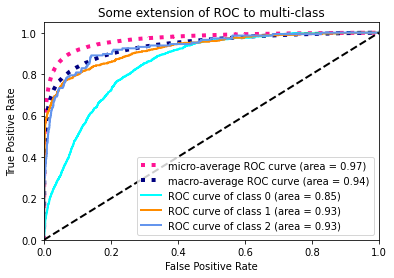

In [147]:
n_classes = len(tags_counts)
roc_auc(y_val, y_val_predicted_scores_mybag, n_classes)

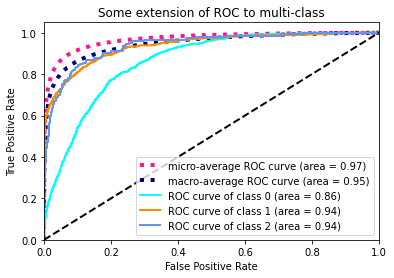

In [148]:
n_classes = len(tags_counts)
roc_auc(y_val, y_val_predicted_scores_tfidf, n_classes)

In [149]:
for penalty in ('l1', 'l2'):
    for C in (0.1, 0.6, 1, 3):
        print('Penalty:', penalty, 'C=', C)
        classifier_mybag = train_classifier(X_train_mybag, y_train, penalty, C)
        classifier_tfidf = train_classifier(X_train_tfidf, y_train, penalty, C)
        y_val_predicted_labels_mybag = classifier_mybag.predict(X_val_mybag)

        y_val_predicted_labels_tfidf = classifier_tfidf.predict(X_val_tfidf)
        print('Bag-of-words')
        print('F1-score weighted:', f1_score(y_val, y_val_predicted_labels_mybag, average='weighted'))
        print('Tfidf')
        print('F1-score weighted:', f1_score(y_val, y_val_predicted_labels_tfidf, average='weighted'))

Penalty: l1 C= 0.1
Bag-of-words
F1-score weighted: 0.5836991267899991
Tfidf
F1-score weighted: 0.5577898278728262
Penalty: l1 C= 0.6
Bag-of-words
F1-score weighted: 0.6287006364637449
Tfidf
F1-score weighted: 0.634978465816014
Penalty: l1 C= 1
Bag-of-words
F1-score weighted: 0.633431907203039
Tfidf
F1-score weighted: 0.6463725940438562
Penalty: l1 C= 3
Bag-of-words
F1-score weighted: 0.6375007604817894
Tfidf
F1-score weighted: 0.6575405128497501
Penalty: l2 C= 0.1
Bag-of-words
F1-score weighted: 0.5622055268353606
Tfidf
F1-score weighted: 0.3861506080937113
Penalty: l2 C= 0.6
Bag-of-words
F1-score weighted: 0.6189759627319104
Tfidf
F1-score weighted: 0.5798466775227017
Penalty: l2 C= 1
Bag-of-words
F1-score weighted: 0.6261046786183034
Tfidf
F1-score weighted: 0.6072744006909108
Penalty: l2 C= 3
Bag-of-words
F1-score weighted: 0.6330793416144456
Tfidf
F1-score weighted: 0.6388918773484269


In [0]:
classifier_tfidf = train_classifier(X_train_tfidf, y_train, penalty='l1', C=3)

In [152]:
test_predictions = classifier_tfidf.predict(X_test_tfidf) ######### YOUR CODE HERE #############
test_pred_inversed = mlb.inverse_transform(test_predictions)

test_predictions_for_submission = '\n'.join('%i\t%s' % (i, ','.join(row)) for i, row in enumerate(test_pred_inversed))
grader.submit_tag('MultilabelClassification', test_predictions_for_submission)

Current answer for task MultilabelClassification is:
 0	mysql,php
1	html,javascript,jquery
2	
3	javascript,jquery
4	android,java
5	parsing,php,xml
6	json,...


In [0]:
def print_words_for_tag(classifier, tag, tags_classes, index_to_words, all_words):
    """
        classifier: trained classifier
        tag: particular tag
        tags_classes: a list of classes names from MultiLabelBinarizer
        index_to_words: index_to_words transformation
        all_words: all words in the dictionary
        
        return nothing, just print top 5 positive and top 5 negative words for current tag
    """
    print('Tag:\t{}'.format(tag))
    
    # Extract an estimator from the classifier for the given tag.
    # Extract feature coefficients from the estimator. 
    
    ######################################
    ######### YOUR CODE HERE #############
    ######################################
    
    coef = classifier.coef_[tags_classes.index(tag)]
    
    top_positive_words = [index_to_words[idx] for idx in coef.argsort()[-1:-6:-1]]# top-5 words sorted by the coefficiens.
    top_negative_words = [index_to_words[idx] for idx in coef.argsort()[:5]]# bottom-5 words  sorted by the coefficients.
    print('Top positive words:\t{}'.format(', '.join(top_positive_words)))
    print('Top negative words:\t{}\n'.format(', '.join(top_negative_words)))

In [154]:
print_words_for_tag(classifier_tfidf, 'c', mlb.classes, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier_tfidf, 'c++', mlb.classes, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier_tfidf, 'linux', mlb.classes, tfidf_reversed_vocab, ALL_WORDS)

Tag:	c
Top positive words:	scanf, installing ruby, malloc, # define, python c++
Top negative words:	php, javascript, java, jquery, ruby

Tag:	c++
Top positive words:	c++, qt, stdstring, boost, mfc
Top negative words:	php, java, javascript, c++ stl, jquery

Tag:	linux
Top positive words:	linux, kernel space, system call, resource temporarily, dlopen
Top negative words:	aspnet, nokogiri, codeigniter, #, javascript



In [155]:
grader.status()

You want to submit these parts:
Task TextPrepare:
 sqlite php readonly
creating multiple textboxes dynamically
self prefer javascript
save php date str...
Task WordsTagsCount:
 javascript,c#,java
using,php,java...
Task BagOfWords:
 7...
Task MultilabelClassification:
 0	mysql,php
1	html,javascript,jquery
2	
3	javascript,jquery
4	android,java
5	parsing,php,xml
6	json,...


In [156]:
STUDENT_EMAIL = 'trishitapingolia@gmail.com'# EMAIL 
STUDENT_TOKEN = 'B6JN4GTj1sAKI9wu'# TOKEN 
grader.status()

You want to submit these parts:
Task TextPrepare:
 sqlite php readonly
creating multiple textboxes dynamically
self prefer javascript
save php date str...
Task WordsTagsCount:
 javascript,c#,java
using,php,java...
Task BagOfWords:
 7...
Task MultilabelClassification:
 0	mysql,php
1	html,javascript,jquery
2	
3	javascript,jquery
4	android,java
5	parsing,php,xml
6	json,...


In [157]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!
